In [130]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [131]:
import sqlite3
import pandas as pd
import datetime
from textblob import TextBlob
import spacy

In [133]:
nlp = spacy.load('en')

ImportError: Can't import language en from spacy.lang.

In [127]:
import os
%%bash which spacy

//Users/aljones/anaconda/bin/spacy


In [128]:
import sputnik
print(sputnik.util.default_data_path('spacy'))h

/Users/aljones/anaconda/lib/python3.5/site-packages/spacy/data


In [105]:
conn = sqlite3.connect('chat.db')
c = conn.cursor()

In [55]:
cmd2 = 'SELECT ROWID, text, handle_id, \
            datetime(date + strftime(\'%s\',\'2001-01-01\'), \'unixepoch\') as date_utc \
            FROM message T1 \
            INNER JOIN chat_message_join T2 \
                ON T1.ROWID=T2.message_id \
                AND T1.is_from_me=1\
            ORDER BY T2.chat_ID, T1.date'
c.execute(cmd2)
all_msg = pd.DataFrame(c.fetchall(), columns=['id','text','sender','time'])

In [138]:
all_msg.time = pd.to_datetime(all_msg.time)
#cutting to just 2017
twentyseventeen_msg = all_msg[all_msg.time.dt.year == 2017]
all_msg_clean = all_msg[all_msg.time.dt.year > 2015]

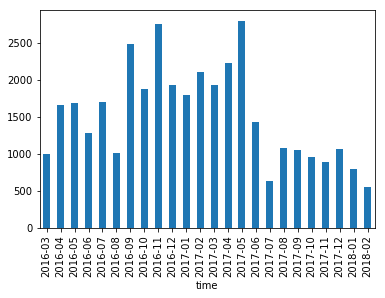

In [139]:
all_msg_clean['id'].groupby(all_msg_clean.time.dt.to_period('M')).count().plot(kind='bar')

In [80]:
texts_2017 = twentyseventeen_msg['text']
texts_2017 = [text for text in texts_2017]

In [93]:
twentyseventeen_msg = twentyseventeen_msg.assign(polarity=pd.Series([TextBlob(text).sentiment.polarity for text in twentyseventeen_msg['text']]))

In [95]:
twentyseventeen_msg = twentyseventeen_msg.assign(subjectivity=pd.Series([TextBlob(text).sentiment.subjectivity for text in twentyseventeen_msg['text']]))

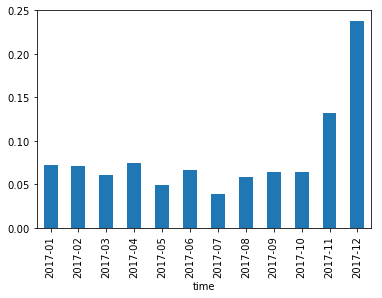

In [135]:
twentyseventeen_msg['polarity'].groupby(twentyseventeen_msg.time.dt.to_period('M')).mean().plot(kind='bar')

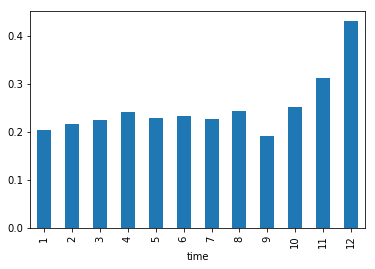

In [97]:
twentyseventeen_msg['subjectivity'].groupby(twentyseventeen_msg.time.dt.month).mean().plot(kind='bar')